In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('../data/original-data/Jmaps.csv', index_col = [0])
df.loc[df['nameClass'].str.contains('_\$\$_'),'nameClass'] = df.loc[df['nameClass'].str.contains('_\$\$_'),'nameClass'].apply(lambda x : x.split('_$$_')[0])
df.loc[df['nameClass'].str.contains('\$\$'),'nameClass'] = df.loc[df['nameClass'].str.contains('\$\$'),'nameClass'].apply(lambda x : x.split('$$')[0])
df = df.drop_duplicates()
df = df.groupby(['timestamp','server','nameClass']).sum().reset_index()
df.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes
0,2021-07-25T09:10:57Z,NFBTGBZEVDR,[B,78946,10,15286040
1,2021-07-25T09:10:57Z,NFBTGBZEVDR,[C,1216019,1,209569240
2,2021-07-25T09:10:57Z,NFBTGBZEVDR,[F,1741,377,48608
3,2021-07-25T09:10:57Z,NFBTGBZEVDR,[I,234572,19,8447184
4,2021-07-25T09:10:57Z,NFBTGBZEVDR,[J,5512,79,1159688


In [3]:
df_oom = pd.read_csv('../data/original-data/Jmaps-OOM.csv', index_col = [0])
df_oom.loc[df_oom['nameClass'].str.contains('_\$\$_'),'nameClass'] = df_oom.loc[df_oom['nameClass'].str.contains('_\$\$_'),'nameClass'].apply(lambda x : x.split('_$$_')[0])
df_oom.loc[df_oom['nameClass'].str.contains('\$\$'),'nameClass'] = df_oom.loc[df_oom['nameClass'].str.contains('\$\$'),'nameClass'].apply(lambda x : x.split('$$')[0])
df_oom = df_oom.drop_duplicates()
df_oom = df_oom.groupby(['timestamp','server','nameClass']).sum().reset_index()
df_oom.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes
0,2020-12-01T16:26:00Z,BZZBGB0JRID,[B,27870118,1,951714752
1,2020-12-01T16:26:00Z,BZZBGB0JRID,[C,2135077,6,433637784
2,2020-12-01T16:26:00Z,BZZBGB0JRID,[I,736576,14,34709920
3,2020-12-01T16:26:00Z,BZZBGB0JRID,[J,7396,39,8245664
4,2020-12-01T16:26:00Z,BZZBGB0JRID,[Lcom.lowagie.text.pdf.IntHashtable$Entry;,15,447,90224


In [4]:
metadata = pd.read_csv('../data/original-data/all-instances-metadata.csv', index_col = [0])
metadata = metadata[metadata['Xms'].notna()]
metadata = metadata [['server', 'softwareType', 'softwareVersion', 'databaseVersion', 'HibernateVersion', '#weeklyUsers', 'swap', 'Xms', 'Xmx', 'serverGroup']]
metadata.head()

,server,softwareType,softwareVersion,databaseVersion,HibernateVersion,#weeklyUsers,swap,Xms,Xmx,serverGroup
0,UBXDGB4D,Sales,V8_1,19.0.0.0.0,NaN,4.0,6.442447e+09,6.291456e+09,6.291456e+09,WIRYGBSH
1,EYQDGBII7N0,Sales,V8_1,19.0.0.0.0,NaN,55.0,6.442447e+09,6.291456e+09,6.291456e+09,WIRYGBSH
2,YUDQGBIT,Sales,V7_1,11.2.0.3.0,NaN,NaN,1.718406e+10,6.291456e+09,6.291456e+09,JSAZGBPP
5,LHVQGBIL,Sales,V11_1,11.2.0.3.0,NaN,55.0,6.291448e+09,6.291456e+09,6.291456e+09,JQMJGBT7
6,TBEUGBJN1CQ,Factory,V15_1,12.2.0.1.0,5.2.17.Final-infologic-10,20.0,6.442447e+09,4.294967e+09,4.294967e+09,BIHMGBTW


In [5]:
dict_instances = dict(zip(metadata.server, metadata.softwareType))

In [6]:
df['softwareType'] = df['server'].apply(lambda x : dict_instances[x])
df.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes,softwareType
0,2021-07-25T09:10:57Z,NFBTGBZEVDR,[B,78946,10,15286040,Factory
1,2021-07-25T09:10:57Z,NFBTGBZEVDR,[C,1216019,1,209569240,Factory
2,2021-07-25T09:10:57Z,NFBTGBZEVDR,[F,1741,377,48608,Factory
3,2021-07-25T09:10:57Z,NFBTGBZEVDR,[I,234572,19,8447184,Factory
4,2021-07-25T09:10:57Z,NFBTGBZEVDR,[J,5512,79,1159688,Factory


In [7]:
'uncharacterized servers'
set(df_oom['server'].unique()) - set(metadata['server'].unique())

{'ALIGGBNF', 'KNZFGBOO'}

In [8]:
df_oom.drop(df_oom[df_oom['server'] == 'ALIGGBNF'].index, inplace = True)
df_oom.drop(df_oom[df_oom['server'] == 'KNZFGBOO'].index, inplace = True)

In [9]:
df_oom['softwareType'] = df_oom['server'].apply(lambda x : dict_instances[x])
df_oom.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes,softwareType
0,2020-12-01T16:26:00Z,BZZBGB0JRID,[B,27870118,1,951714752,Sales
1,2020-12-01T16:26:00Z,BZZBGB0JRID,[C,2135077,6,433637784,Sales
2,2020-12-01T16:26:00Z,BZZBGB0JRID,[I,736576,14,34709920,Sales
3,2020-12-01T16:26:00Z,BZZBGB0JRID,[J,7396,39,8245664,Sales
4,2020-12-01T16:26:00Z,BZZBGB0JRID,[Lcom.lowagie.text.pdf.IntHashtable$Entry;,15,447,90224,Sales


In [10]:
'Total number of snapshots in 7 Sundays'
df.groupby(['server','timestamp']).size().reset_index().shape[0]

3074

In [11]:
'Number of snapshots per server in Sundays'
df.groupby(['server','timestamp']).size().reset_index().groupby('server').size().sort_values(ascending = False)

server
AANNGBE51AX    7
TIWRGBG1AMQ    7
RMWZGBB3       7
RKGNGBFT5QW    7
RKCAGBCI9TQ    7
              ..
VOYOGBO8       1
ZNNIGB2F       1
CWPHGBP1N5Z    1
JRVCGBTSAG7    1
PQEXGBR7       1
Length: 460, dtype: int64

In [12]:
'Total number of oom snapshots'
df_oom.groupby(['server','timestamp']).size().reset_index().shape[0]

1087

In [13]:
df_oom[df_oom['softwareType'] == 'Sales'].groupby(['server','timestamp']).size().reset_index().shape[0]

799

In [14]:
df_oom['softwareType'].value_counts().values[:2].sum() / df_oom['softwareType'].value_counts().values[:].sum()

0.8797556239604423

In [15]:
df['server'].nunique()

460

In [16]:
df_oom['server'].nunique()

106

In [17]:
'Number of oom snapshots per server'
df_oom.groupby(['server','timestamp']).size().reset_index().groupby('server').size().sort_values(ascending = False)

server
XCEZGBAA       268
VTMFGBJ8321    183
GCHFGBKM       107
VANPGBOI        75
GUCUGBE0Q7K     30
              ... 
SIVGGB99         1
SJZVGBQLKRB      1
SKMBGBT5         1
TCULGBFM         1
AANNGBE51AX      1
Length: 106, dtype: int64

In [18]:
healthyServers = set(df['server'].unique()) - set(df_oom['server'].unique())
round(len(healthyServers) / df['server'].nunique(),2)

0.78

In [19]:
'We keep only healthy servers'
df = df[df['server'].isin(healthyServers)]
df.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes,softwareType
0,2021-07-25T09:10:57Z,NFBTGBZEVDR,[B,78946,10,15286040,Factory
1,2021-07-25T09:10:57Z,NFBTGBZEVDR,[C,1216019,1,209569240,Factory
2,2021-07-25T09:10:57Z,NFBTGBZEVDR,[F,1741,377,48608,Factory
3,2021-07-25T09:10:57Z,NFBTGBZEVDR,[I,234572,19,8447184,Factory
4,2021-07-25T09:10:57Z,NFBTGBZEVDR,[J,5512,79,1159688,Factory


In [20]:
'Transform size Byte to size MB for both datasets'
df['sizeBytes'] = df['sizeBytes'] // 1000000
df_oom['sizeBytes'] = df_oom['sizeBytes'] // 1000000

In [21]:
'Take for each server classes with rang >= 100'
df_oom = df_oom.groupby(['server','timestamp']).apply(lambda x: x.sort_values(by = 'sizeBytes',ascending = False)[:100]).reset_index(drop = True)
df_oom.head()

,timestamp,server,nameClass,#objects,rangClass,sizeBytes,softwareType
0,2021-02-14T17:20:15Z,AANNGBE51AX,[C,2116720,1,430,Sales
1,2021-02-14T17:20:15Z,AANNGBE51AX,[Ljava.lang.Object;,3275522,2,160,Sales
2,2021-02-14T17:20:15Z,AANNGBE51AX,java.lang.reflect.Method,1741373,3,153,Sales
3,2021-02-14T17:20:15Z,AANNGBE51AX,java.lang.String,5537885,4,132,Sales
4,2021-02-14T17:20:15Z,AANNGBE51AX,java.util.HashMap$Node,3787563,5,121,Sales


In [22]:
df_vt = df[df['softwareType'] == 'Sales'].reset_index(drop = True)
del df_vt['softwareType']

df_oom_vt = df_oom[df_oom['softwareType'] == 'Sales'].reset_index(drop = True)
del df_oom_vt['softwareType']

In [23]:
df_vt = df_vt[df_vt['nameClass'].isin(df_oom_vt['nameClass'].unique())].reset_index(drop = True)
df_oom_vt = df_oom_vt[df_oom_vt['nameClass'].isin(df_vt['nameClass'].unique())].reset_index(drop = True)

In [24]:
classes_flatten_vt = df_vt.groupby(['server','timestamp']).apply(lambda x : dict(zip(x.nameClass, x.sizeBytes)))
df_vt_flatten = pd.DataFrame(0, index = classes_flatten_vt.index, columns = df_vt['nameClass'].unique()).reset_index()
df_vt_flatten = df_vt_flatten.set_index(['server','timestamp'])
for classe in df_vt['nameClass'].unique():
    df_vt_flatten[classe] = classes_flatten_vt.apply(lambda x : x[classe] if classe in x else 0)

In [25]:
classes_flatten_oom_vt = df_oom_vt.groupby(['server','timestamp']).apply(lambda x : dict(zip(x.nameClass, x.sizeBytes)))
df_oom_vt_flatten = pd.DataFrame(0, index = classes_flatten_oom_vt.index, columns = df_oom_vt['nameClass'].unique()).reset_index()
df_oom_vt_flatten = df_oom_vt_flatten.set_index(['server','timestamp'])
for classe in df_oom_vt['nameClass'].unique():
    df_oom_vt_flatten[classe] = classes_flatten_oom_vt.apply(lambda x : x[classe] if classe in x else 0)

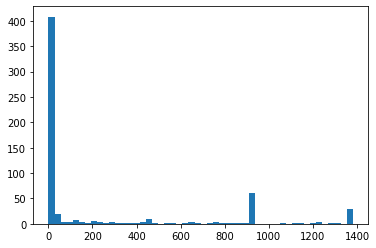

In [26]:
'y = number of classes'
'x = frequency of occurence w.r.t nb snapshots'
plt.hist((df_vt_flatten != 0).astype(int).sum(axis=0), 50, alpha = 1, density = False)
plt.show()

In [27]:
'smallest required of snapshots per class number to form a distribution'
min_dist = 10

In [28]:
df_vt_flatten = df_vt_flatten[list((df_vt_flatten != 0).astype(int).sum(axis=0)[(df_vt_flatten != 0).astype(int).sum(axis=0) >= min_dist].index)]
df_oom_vt_flatten = df_oom_vt_flatten[list((df_vt_flatten != 0).astype(int).sum(axis=0)[(df_vt_flatten != 0).astype(int).sum(axis=0) >= min_dist].index)]

In [29]:
df_vt_flatten['sum'] = df_vt_flatten.sum(axis = 1)
df_oom_vt_flatten['sum'] = df_oom_vt_flatten.sum(axis = 1)

In [30]:
df_vt_flatten.head()

[B   [C  [I  [J  \
server   timestamp                               
ABHRGBCN 2021-07-25T09:20:20Z  40  438  23   4   
         2021-08-01T09:19:56Z  38  442  27   3   
         2021-08-08T09:20:22Z  37  440  27   2   
         2021-08-15T09:20:22Z  37  441  28   2   
         2021-08-22T09:20:30Z  37  440  26   2   

                               [Ljava.beans.MethodDescriptor;  \
server   timestamp                                              
ABHRGBCN 2021-07-25T09:20:20Z                               0   
         2021-08-01T09:19:56Z                               0   
         2021-08-08T09:20:22Z                               0   
         2021-08-15T09:20:22Z                               0   
         2021-08-22T09:20:30Z                               0   

                               [Ljava.lang.Class;  [Ljava.lang.Object;  \
server   timestamp                                                       
ABHRGBCN 2021-07-25T09:20:20Z                  18                   94   
         2021-08-01T09:19:56Z                  18                   94   
         2021-08-08T09:20:22Z                  18                   94   
         2021-08-15T09:20:22Z                  18                   94   
         2021-08-22T09:20:30Z                  18                   94   

                               [Ljava.lang.String;  \
server   timestamp                                   
ABHRGBCN 2021-07-25T09:20:20Z                   98   
         2021-08-01T09:19:56Z                   98   
         2021-08-08T09:20:22Z                   97   
         2021-08-15T09:20:22Z                   97   
         2021-08-22T09:20:30Z                   97   

                               [Ljava.lang.ThreadLocal$ThreadLocalMap$Entry;  \
server   timestamp                                                             
ABHRGBCN 2021-07-25T09:20:20Z                                              0   
         2021-08-01T09:19:56Z                                              0   
         2021-08-08T09:20:22Z                                              0   
         2021-08-15T09:20:22Z                                              0   
         2021-08-22T09:20:30Z                                              0   

                               [Ljava.lang.reflect.Method;  ...  \
server   timestamp                                          ...   
ABHRGBCN 2021-07-25T09:20:20Z                            4  ...   
         2021-08-01T09:19:56Z                            3  ...   
         2021-08-08T09:20:22Z                            3  ...   
         2021-08-15T09:20:22Z                            3  ...   
         2021-08-22T09:20:30Z                            3  ...   

                               fr.infologic.gpao.atelier.modele.MethodeFab  \
server   timestamp                                                           
ABHRGBCN 2021-07-25T09:20:20Z                                            0   
         2021-08-01T09:19:56Z                                            0   
         2021-08-08T09:20:22Z                                            0   
         2021-08-15T09:20:22Z                                            0   
         2021-08-22T09:20:30Z                                            0   

                               fr.infologic.infoc.services.infocentre.CriteriaInfo  \
server   timestamp                                                                   
ABHRGBCN 2021-07-25T09:20:20Z                                                  0     
         2021-08-01T09:19:56Z                                                  0     
         2021-08-08T09:20:22Z                                                  0     
         2021-08-15T09:20:22Z                                                  0     
         2021-08-22T09:20:30Z                                                  0     

                               fr.infologic.ventes.article.modele.Article  \
server   timestamp                                                  

In [31]:
df_oom_vt_flatten.head()

,,[B,[C,[I,[J,[Ljava.beans.MethodDescriptor;,[Ljava.lang.Class;,[Ljava.lang.Object;,[Ljava.lang.String;,[Ljava.lang.ThreadLocal$ThreadLocalMap$Entry;,[Ljava.lang.reflect.Method;,...,fr.infologic.gpao.atelier.modele.MethodeFab,fr.infologic.infoc.services.infocentre.CriteriaInfo,fr.infologic.ventes.article.modele.Article,fr.infologic.ventes.client.modele.CliLiv,fr.infologic.edi.eancom.modele.ElementEancom,fr.infologic.global.zonesvariables.modele.FamZVVal,fr.infologic.core.server.i18n.internal.TMsgT,fr.infologic.core.services.session.SessionContextProgressMonitor,fr.infologic.core.services.session.SessionContextProgressMonitor$TaskSubtask,sum
server,timestamp,,,,,,,,,,,,,,,,,,,,,
AANNGBE51AX,2021-02-14T17:20:15Z,83,430,47,3,0,16,160,87,0,3,...,0,0,0,0,0,0,0,0,0,1935
ACOPGBDW1ZW,2021-04-08T12:01:11Z,952,463,20,2,0,14,463,86,0,3,...,0,0,0,0,0,0,0,0,0,4813
AMIKGBP2MM0,2021-08-12T09:02:13Z,149,551,40,11,0,15,177,95,0,3,...,0,0,0,0,0,0,0,0,0,3361
ATDJGBRS,2021-09-06T07:12:13Z,67,319,22,2,0,9,385,28,0,0,...,0,0,0,0,0,0,0,0,0,2855
AVZGGBOW,2021-08-08T03:57:52Z,70,419,57,58,0,15,159,88,0,3,...,0,0,0,0,0,0,0,0,0,1898


In [32]:
max_sum = max(df_oom_vt_flatten['sum'].max(), df_vt_flatten['sum'].max())
max_sum

13234

In [33]:
for classe in list(df_vt_flatten.columns)[:-1]:
    df_vt_flatten[classe] = df_vt_flatten[classe] * (max_sum / df_vt_flatten['sum'])
    df_vt_flatten[classe] = df_vt_flatten[classe].round()
    df_oom_vt_flatten[classe] = df_oom_vt_flatten[classe] * (max_sum / df_oom_vt_flatten['sum'])
    df_oom_vt_flatten[classe] = df_oom_vt_flatten[classe].round()

In [34]:
dist= df_vt_flatten['fr.infologic.core.services.droits.RightValue'][df_vt_flatten['fr.infologic.core.services.droits.RightValue'] > 0]
dist

server       timestamp           
BAAKGBHZW4U  2021-07-25T09:23:26Z      7.0
             2021-08-01T09:22:50Z      7.0
             2021-08-15T09:23:39Z      7.0
             2021-08-22T09:23:46Z      7.0
             2021-08-29T09:23:45Z     14.0
             2021-09-05T12:45:34Z     20.0
FNLSGB77     2021-07-25T09:17:13Z      7.0
             2021-08-15T09:17:15Z      7.0
GPOWGBO8BSG  2021-08-29T09:24:39Z      7.0
HCVGGBCK0V0  2021-07-25T09:21:03Z      7.0
             2021-08-08T09:21:06Z      7.0
             2021-08-15T09:21:06Z      7.0
             2021-08-22T09:21:13Z      7.0
             2021-08-29T09:21:17Z      7.0
JZPIGBFH     2021-07-25T09:22:13Z     15.0
             2021-08-08T09:22:19Z      5.0
             2021-08-22T09:22:26Z     15.0
             2021-08-29T09:22:31Z     25.0
TIWRGBG1AMQ  2021-07-25T09:24:27Z    222.0
             2021-08-08T09:24:31Z     20.0
             2021-08-15T09:24:37Z     20.0
             2021-08-22T09:24:45Z     33.0
             2021-08

In [35]:
dist_oom = df_oom_vt_flatten['fr.infologic.core.services.droits.RightValue'][df_oom_vt_flatten['fr.infologic.core.services.droits.RightValue'] > 0]
dist_oom

server       timestamp           
AMIKGBP2MM0  2021-08-12T09:02:13Z    16.0
DPAMGBIEN09  2021-05-21T13:37:08Z    45.0
             2021-05-21T13:43:47Z    46.0
DXNSGBW4ZHY  2021-05-06T07:53:33Z    18.0
             2021-07-27T09:58:34Z    38.0
                                     ... 
XJOZGBZCDUC  2021-07-30T06:53:29Z    23.0
             2021-07-31T22:38:48Z     7.0
             2021-08-31T22:42:14Z    19.0
XQDBGBX70NZ  2021-07-22T10:19:55Z    14.0
             2021-07-22T10:47:48Z    18.0
Name: fr.infologic.core.services.droits.RightValue, Length: 153, dtype: float64

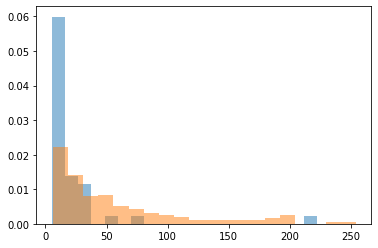

In [36]:
plt.hist(dist, 20, alpha = 0.5, density = True)
plt.hist(dist_oom, 20, alpha = 0.5, density = True)
plt.show()

### Data Model

In [37]:
import Utils

In [38]:
len(df_vt_flatten.columns)

221

In [39]:
tree = Utils.createTree(df_vt_flatten.columns[:-1])
tree.agregatePackages()

In [40]:
fileDAG = open('../data/data-vt/DAG-VT.txt', "w") 
fileItems = open('../data/data-vt/itemsNames-vt.txt', "w") 
fileDAG.write('parent,child\n') 
Utils.exportToText(tree, fileDAG, fileItems)
fileDAG.close()
fileItems.close()

In [41]:
fileSupportAll = open('../data/data-vt/supportAll-vt.txt', "w") 
s = Utils.supportAll(tree, df_vt_flatten, fileSupportAll) 
fileSupportAll.close()

In [42]:
df_vt_flatten

[B      [C     [I    [J  \
server   timestamp                                          
ABHRGBCN 2021-07-25T09:20:20Z  254.0  2779.0  146.0  25.0   
         2021-08-01T09:19:56Z  236.0  2745.0  168.0  19.0   
         2021-08-08T09:20:22Z  231.0  2743.0  168.0  12.0   
         2021-08-15T09:20:22Z  230.0  2741.0  174.0  12.0   
         2021-08-22T09:20:30Z  231.0  2747.0  162.0  12.0   
...                              ...     ...    ...   ...   
ZWQDGB53 2021-08-08T09:20:25Z  160.0  2745.0  142.0  53.0   
         2021-08-15T09:20:25Z  151.0  2739.0  142.0  53.0   
         2021-08-22T09:20:33Z  158.0  2759.0  140.0  53.0   
         2021-08-29T09:20:37Z  150.0  2723.0  141.0  53.0   
         2021-09-05T11:29:09Z  190.0  3186.0  134.0  47.0   

                               [Ljava.beans.MethodDescriptor;  \
server   timestamp                                              
ABHRGBCN 2021-07-25T09:20:20Z                             0.0   
         2021-08-01T09:19:56Z                             0.0   
         2021-08-08T09:20:22Z                             0.0   
         2021-08-15T09:20:22Z                             0.0   
         2021-08-22T09:20:30Z                             0.0   
...                                                       ...   
ZWQDGB53 2021-08-08T09:20:25Z                             0.0   
         2021-08-15T09:20:25Z                             0.0   
         2021-08-22T09:20:33Z                             0.0   
         2021-08-29T09:20:37Z                             0.0   
         2021-09-05T11:29:09Z                             0.0   

                               [Ljava.lang.Class;  [Ljava.lang.Object;  \
server   timestamp                                                       
ABHRGBCN 2021-07-25T09:20:20Z               114.0                596.0   
         2021-08-01T09:19:56Z               112.0                584.0   
         2021-08-08T09:20:22Z               112.0                586.0   
         2021-08-15T09:20:22Z               112.0                584.0   
         2021-08-22T09:20:30Z               112.0                587.0   
...                                           ...                  ...   
ZWQDGB53 2021-08-08T09:20:25Z               124.0                604.0   
         2021-08-15T09:20:25Z               124.0                603.0   
         2021-08-22T09:20:33Z               123.0                596.0   
         2021-08-29T09:20:37Z               124.0                601.0   
         2021-09-05T11:29:09Z               119.0                585.0   

                               [Ljava.lang.String;  \
server   timestamp                                   
ABHRGBCN 2021-07-25T09:20:20Z                622.0   
         2021-08-01T09:19:56Z                609.0   
         2021-08-08T09:20:22Z                605.0   
         2021-08-15T09:20:22Z                603.0   
         2021-08-22T09:20:30Z                606.0   
...                                            ...   
ZWQDGB53 2021-08-08T09:20:25Z                737.0   
         2021-08-15T09:20:25Z                736.0   
         2021-08-22T09:20:33Z                736.0   
         2021-08-29T09:20:37Z                734.0   
         2021-09-05T11:29:09Z                672.0   

                               [Ljava.lang.ThreadLocal$ThreadLocalMap$Entry;  \
server   timestamp                                                             
ABHRGBCN 2021-07-25T09:20:20Z                                            0.0   
         2021-08-01T09:19:56Z                                            0.0   
         2021-08-08T09:20:22Z                                            0.0   
         2021-08-15T09:20:22Z                                            0.0   
         2021-08-22T09:20:30Z                                            0.0   
...                                                                      ...   
ZWQDGB53 2021-08-08T09:20:25Z                                            0.0   
        

In [43]:
fileSupportAllZeros = open('../data/data-vt/supportAllZeros-vt.txt', "w") 
s = Utils.supportAllZeros(tree, df_vt_flatten, fileSupportAllZeros) 
fileSupportAllZeros.close()

In [44]:
treeVis = Utils.createGraphTree(tree, None)
treeVis.show()

Root : (0) : 13227
├── [B : (1) : 289
├── [C : (2) : 3099
├── [I : (3) : 160
├── [J : (4) : 17
├── [Ljava : (371) : 2470
│   ├── [Ljava.beans.MethodDescriptor; : (5) : 0
│   ├── [Ljava.lang : (316) : 1383
│   │   ├── [Ljava.lang.Class; : (6) : 127
│   │   ├── [Ljava.lang.Object; : (7) : 599
│   │   ├── [Ljava.lang.String; : (8) : 641
│   │   ├── [Ljava.lang.ThreadLocal$ThreadLocalMap$Entry; : (9) : 0
│   │   └── [Ljava.lang.reflect.Method; : (10) : 16
│   ├── [Ljava.security.Principal; : (11) : 1
│   └── [Ljava.util : (313) : 1086
│       ├── [Ljava.util.HashMap$Node; : (12) : 986
│       ├── [Ljava.util.Hashtable$Entry; : (13) : 25
│       ├── [Ljava.util.WeakHashMap$Entry; : (14) : 2
│       └── [Ljava.util.concurrent.ConcurrentHashMap$Node; : (15) : 73
├── [Lnet.sf.hibernate.type.Type; : (167) : 4
├── [Lorg : (411) : 112
│   ├── [Lorg.apache : (406) : 102
│   │   ├── [Lorg.apache.commons.collections : (311) : 100
│   │   │   ├── [Lorg.apache.commons.collections.StaticBucketMap$Lock;

In [45]:
treeSnapshot = Utils.createTree(df_vt_flatten.columns[:-1])
treeSnapshot.agregatePackages()
fileSupportSnapshot = open('../data/data-vt/supportSnapshot-vt.txt', "w")
idSnapshot = 10
s = Utils.supportSnapshot(treeSnapshot, df_oom_vt_flatten, idSnapshot, fileSupportSnapshot, withId = False) 
fileSupportSnapshot.close()

In [46]:
treeVisSnapshot = Utils.createGraphTree(treeSnapshot, None)
treeVisSnapshot.show()

Root : (0) : 13245
├── [B : (1) : 1059
├── [C : (2) : 1283
├── [I : (3) : 75
├── [J : (4) : 0
├── [Ljava : (371) : 2284
│   ├── [Ljava.beans.MethodDescriptor; : (5) : 0
│   ├── [Ljava.lang : (316) : 1843
│   │   ├── [Ljava.lang.Class; : (6) : 52
│   │   ├── [Ljava.lang.Object; : (7) : 1515
│   │   ├── [Ljava.lang.String; : (8) : 267
│   │   ├── [Ljava.lang.ThreadLocal$ThreadLocalMap$Entry; : (9) : 0
│   │   └── [Ljava.lang.reflect.Method; : (10) : 9
│   ├── [Ljava.security.Principal; : (11) : 0
│   └── [Ljava.util : (313) : 441
│       ├── [Ljava.util.HashMap$Node; : (12) : 392
│       ├── [Ljava.util.Hashtable$Entry; : (13) : 20
│       ├── [Ljava.util.WeakHashMap$Entry; : (14) : 0
│       └── [Ljava.util.concurrent.ConcurrentHashMap$Node; : (15) : 29
├── [Lnet.sf.hibernate.type.Type; : (167) : 0
├── [Lorg : (411) : 30
│   ├── [Lorg.apache : (406) : 30
│   │   ├── [Lorg.apache.commons.collections : (311) : 30
│   │   │   ├── [Lorg.apache.commons.collections.StaticBucketMap$Lock; : (16

In [47]:
fileSupportAllSnapshots = open('../data/data-vt/supportAllSnapshots-vt.txt', "w")
fileSnapshotNames = open('../data/data-vt/snapshotNames-vt.txt', "w")
Utils.supportAllSnapshot(df_oom_vt_flatten, fileSupportAllSnapshots, fileSnapshotNames)
fileSupportAllSnapshots.close()
fileSnapshotNames.close()

In [48]:
metadata_vt = df_oom_vt_flatten.reset_index()[['server']].join(metadata.set_index('server'), on='server')
metadata_vt['isWeekEndDay'] = pd.to_datetime(df_oom_vt_flatten.reset_index()['timestamp']).dt.tz_localize(None).dt.day_name().apply(lambda x : Utils.isWeekEndDay(x))
metadata_vt

,server,softwareType,softwareVersion,databaseVersion,HibernateVersion,#weeklyUsers,swap,Xms,Xmx,serverGroup,isWeekEndDay
0,AANNGBE51AX,Sales,V16_3_8,12.2.0.1.0,5.2.17.Final-infologic-10,31.0,6.442447e+09,6.291456e+09,6.291456e+09,JFKRGB0O,True
1,ACOPGBDW1ZW,Sales,V13_2,12.2.0.1.0,5.2.17.Final-infologic-5,14.0,1.717987e+10,6.291456e+09,6.291456e+09,ALMDGBB8,False
2,AMIKGBP2MM0,Sales,V15_2,11.2.0.3.0,5.2.17.Final-infologic-10,91.0,1.717987e+10,6.442451e+09,6.442451e+09,FFCNGB1A,False
3,ATDJGBRS,Sales,V10_1,11.2.0.4.0,NaN,41.0,2.516582e+10,6.291456e+09,6.291456e+09,OOFRGBI8,False
4,AVZGGBOW,Sales,V16_1,12.2.0.1.0,5.2.17.Final-infologic-10,49.0,3.435973e+10,6.291456e+09,6.291456e+09,QYLPGBVO,True
...,...,...,...,...,...,...,...,...,...,...,...
794,ZMXUGBZ4,Sales,V13_2_1,11.2.0.3.0,5.2.17.Final-infologic-5,79.0,3.378092e+10,6.291456e+09,1.048576e+10,ZHMNGBLIWOS,False
795,ZMXUGBZ4,Sales,V13_2_1,11.2.0.3.0,5.2.17.Final-infologic-5,79.0,3.378092e+10,6.291456e+09,1.048576e+10,ZHMNGBLIWOS,False
796,ZMXUGBZ4,Sales,V13_2_1,11.2.0.3.0,5.2.17.Final-infologic-5,79.0,3.378092e+10,6.291456e+09,1.048576e+10,ZHMNGBLIWOS,False
797,ZNQUGBJK,Sales,V17_1_5,11.2.0.4.0,5.2.17.Final-infologic-10,179.0,1.677721e+10,6.291456e+09,6.291456e+09,KDGZGBJH,False


In [49]:
metadata_vt.to_csv('../data/data-vt/metadata-vt.csv')